# Clustering Exploration

This notebook contains additional exploration of clustering applied to the recipe/cuisine data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl


from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

## Cuisine Clustering 

This section produces the cuisine clusters using the uncleaned (version 1) of the recipe data. 

In [2]:
train = pd.read_csv("../data/ohe_train_recipes_v1.csv")
test = pd.read_csv("../data/ohe_test_recipes_v1.csv")

In [3]:
train.head()

,id,( oz.) tomato sauce,( oz.) tomato paste,(10 oz.) frozen chopped spinach,"(10 oz.) frozen chopped spinach, thawed and squeezed dry",(14 oz.) sweetened condensed milk,(14.5 oz.) diced tomatoes,(15 oz.) refried beans,1% low-fat buttermilk,1% low-fat chocolate milk,...,yuzu,yuzu juice,za'atar,zest,zesty italian dressing,zinfandel,ziti,zucchini,zucchini blossoms,cuisine
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,spanish
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,mexican
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,french
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,chinese
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,italian


In [4]:
train['cuisine'].unique()

array(['spanish', 'mexican', 'french', 'chinese', 'italian',
       'southern_us', 'indian', 'thai', 'cajun_creole', 'jamaican',
       'japanese', 'greek', 'russian', 'irish', 'moroccan', 'korean',
       'filipino', 'vietnamese', 'british', 'brazilian'], dtype=object)

In [5]:
train_ingred_counts = train.drop(columns=['id']).groupby('cuisine').agg(sum)
train_ingred_counts.head()

,( oz.) tomato sauce,( oz.) tomato paste,(10 oz.) frozen chopped spinach,"(10 oz.) frozen chopped spinach, thawed and squeezed dry",(14 oz.) sweetened condensed milk,(14.5 oz.) diced tomatoes,(15 oz.) refried beans,1% low-fat buttermilk,1% low-fat chocolate milk,1% low-fat cottage cheese,...,yukon gold potatoes,yuzu,yuzu juice,za'atar,zest,zesty italian dressing,zinfandel,ziti,zucchini,zucchini blossoms
cuisine,,,,,,,,,,,,,,,,,,,,,
brazilian,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,3,0
british,0,0,0,0,0,0,0,0,0,0,...,8,0,0,0,0,0,0,0,3,0
cajun_creole,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,13,0
chinese,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,30,0
filipino,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,6,0


In [6]:
tfidf = TfidfTransformer()
tfidf.fit(train_ingred_counts)
train_tfidf = pd.DataFrame(data=tfidf.transform(train_ingred_counts).toarray(),
                 index=train_ingred_counts.index,
                 columns=train_ingred_counts.columns)
train_tfidf.head()

,( oz.) tomato sauce,( oz.) tomato paste,(10 oz.) frozen chopped spinach,"(10 oz.) frozen chopped spinach, thawed and squeezed dry",(14 oz.) sweetened condensed milk,(14.5 oz.) diced tomatoes,(15 oz.) refried beans,1% low-fat buttermilk,1% low-fat chocolate milk,1% low-fat cottage cheese,...,yukon gold potatoes,yuzu,yuzu juice,za'atar,zest,zesty italian dressing,zinfandel,ziti,zucchini,zucchini blossoms
cuisine,,,,,,,,,,,,,,,,,,,,,
brazilian,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.002246,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.006126,0.0
british,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.010989,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.003746,0.0
cajun_creole,0.001129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000551,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.006514,0.0
chinese,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000581,0.0,0.0,0.0,0.008300,0.0
filipino,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.002362,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.006441,0.0


In [7]:
n = 2 #Number of components

pca = PCA(n_components = n)
reduced_tfidf = pca.fit_transform(train_tfidf)

In [8]:
k = 4 #Number of clusters wanted

kmeans = KMeans(init='k-means++', n_clusters=k, n_init=20)
kmeans.fit(reduced_tfidf)
clusters = kmeans.predict(reduced_tfidf)

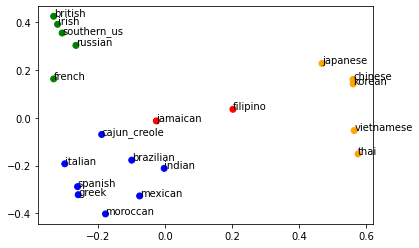

In [9]:
# Plotting Data

cuisine_list = train_tfidf.index.tolist()
colors_list = ['blue','orange','green', 'red', 'pink']
colors = []
labels = []
pc1 = reduced_tfidf[:,0]
pc2 = reduced_tfidf[:,1]

for i in range(len(cuisine_list)):
    colors.append(colors_list[clusters[i]])
    
plt.scatter(pc1, pc2, c = colors)

for i, label in enumerate(cuisine_list):
    plt.text(pc1[i], pc2[i],label)

plt.show()

## Cleaned Cuisine Clustering

Run the same PCA but with cleaned ingredients input to OHE (data version 2)

In [10]:
train = pd.read_csv("../data/ohe_train_recipes_v2.csv")
test = pd.read_csv("../data/ohe_test_recipes_v2.csv")

In [11]:
train_ingred_counts = train.drop(columns=['id']).groupby('cuisine').agg(sum)
tfidf = TfidfTransformer()
tfidf.fit(train_ingred_counts)
train_tfidf = pd.DataFrame(data=tfidf.transform(train_ingred_counts).toarray(),
                 index=train_ingred_counts.index,
                 columns=train_ingred_counts.columns)


In [12]:
n = 2 #Number of components
pca = PCA(n_components = n)
reduced_tfidf = pca.fit_transform(train_tfidf)

k = 3 #Number of clusters wanted
kmeans = KMeans(init='k-means++', n_clusters=k, n_init=20)
kmeans.fit(reduced_tfidf)
clusters = kmeans.predict(reduced_tfidf)

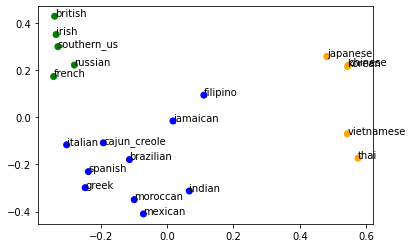

In [13]:
# Plotting Data

cuisine_list = train_tfidf.index.tolist()
colors_list = ['blue','orange','green', 'red', 'pink','purple']
colors = []
labels = []
pc1 = reduced_tfidf[:,0]
pc2 = reduced_tfidf[:,1]

for i in range(len(cuisine_list)):
    colors.append(colors_list[clusters[i]])
    
plt.scatter(pc1, pc2, c = colors)

for i, label in enumerate(cuisine_list):
    plt.text(pc1[i], pc2[i],label)

plt.show()

## Explore Cluster Sizes by Inertia

In [15]:
def compute_clusters_and_inertias(data, max_clusters=8, min_clusters=1):
    clusters = []
    inertias = []
    cluster_sizes = range(min_clusters,max_clusters+1)
    for k in cluster_sizes:
        cluster = KMeans(init='k-means++', n_clusters=k, n_init=20).fit(data)
        clusters.append(cluster)
        inertias.append(cluster.inertia_)
    return list(cluster_sizes), clusters, inertias 


def plot_cluster_inertias(cluster_sizes, interias):
    fig, ax = plt.subplots()
    plt.plot(cluster_sizes, interias, marker='o')
    ax.set_title("Inertia by Number of KMeans Clusters")
    plt.xlabel("# of Clusters")
    plt.ylabel("Inertia")
    return fig, ax

In [16]:
cluster_sizes, cluster_lists, inertias = compute_clusters_and_inertias(reduced_tfidf)

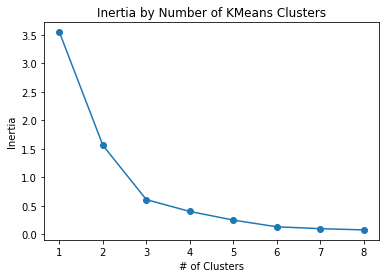

In [17]:
cluster_sizes, cluster_lists, inertias = compute_clusters_and_inertias(reduced_tfidf)
plot_cluster_inertias(cluster_sizes, inertias);

Try computing the clustering in high dimensions, and *then* projecting using PCA for visualization

In [18]:
n = 2 #Number of components
pca = PCA(n_components = n)
reduced_tfidf = pca.fit_transform(train_tfidf)

k = 6 #Number of clusters wanted
kmeans = KMeans(init='k-means++', n_clusters=k, n_init=20)
kmeans.fit(train_tfidf)
clusters = kmeans.predict(train_tfidf)

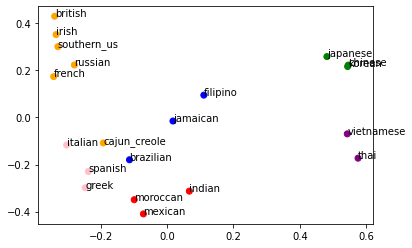

In [19]:
# Plotting Data

cuisine_list = train_tfidf.index.tolist()
colors_list = ['blue','orange','green', 'red', 'pink','purple']
colors = []
labels = []
pc1 = reduced_tfidf[:,0]
pc2 = reduced_tfidf[:,1]

for i in range(len(cuisine_list)):
    colors.append(colors_list[clusters[i]])
    
plt.scatter(pc1, pc2, c = colors)

for i, label in enumerate(cuisine_list):
    plt.text(pc1[i], pc2[i],label)

plt.show()

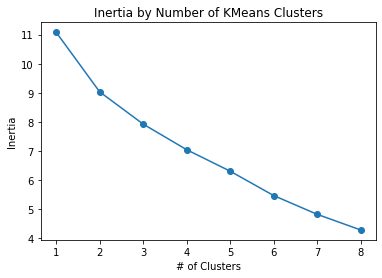

In [20]:
cluster_sizes, cluster_lists, inertias = compute_clusters_and_inertias(train_tfidf)
plot_cluster_inertias(cluster_sizes, inertias);

If we want to explore which cuisines are closest, use hierarchical clustering...

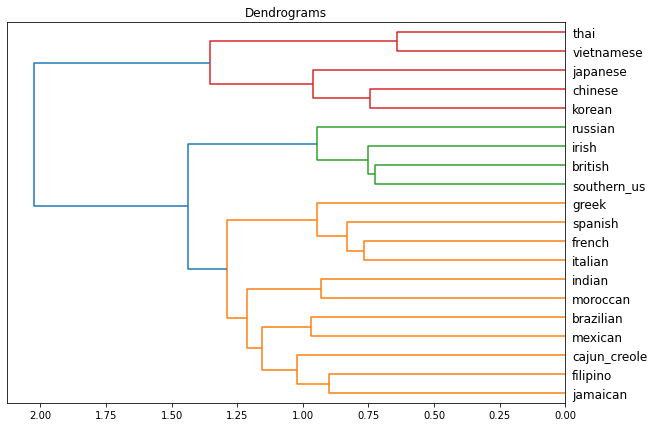

In [21]:
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = dendrogram(linkage(train_tfidf, method='ward'),
                      labels=train_tfidf.index.tolist(), 
                      truncate_mode=None,
                      orientation="left", 
                      color_threshold=1.4,
                      count_sort="descending")

Now visualize the agglomerative clustering using the 2D representation from before. 

In [26]:
from sklearn.cluster import AgglomerativeClustering

In [27]:
cluster_model = AgglomerativeClustering(n_clusters=3)
agg_clusters = cluster_model.fit_predict(train_tfidf)

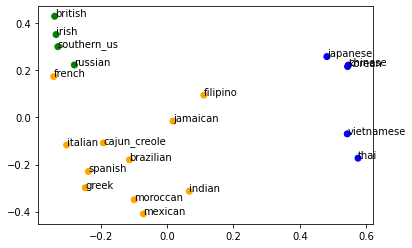

In [28]:
# Plotting Data

cuisine_list = train_tfidf.index.tolist()
colors_list = ['blue','orange','green', 'red', 'pink','purple']
colors = []
labels = []
pc1 = reduced_tfidf[:,0]
pc2 = reduced_tfidf[:,1]

for i in range(len(cuisine_list)):
    colors.append(colors_list[agg_clusters[i]])
    
plt.scatter(pc1, pc2, c = colors)

for i, label in enumerate(cuisine_list):
    plt.text(pc1[i], pc2[i],label)

plt.show()

## Clustering/PCA on Encoded Recipes

Instead of combining recipes into cuisine stats, take the recipes themselves and compute TF-IDF and look at PCA/clustering. 

In [29]:
recipe_ingred_counts = train.set_index("id").drop(columns=['cuisine'])
tfidf = TfidfTransformer()
tfidf.fit(recipe_ingred_counts)
recipe_tfidf = pd.DataFrame(data=tfidf.transform(recipe_ingred_counts).toarray(),
                 index=recipe_ingred_counts.index,
                 columns=recipe_ingred_counts.columns)


In [30]:
recipe_tfidf.head()

,1% cottage cheese,1% milk,2% reduced-fat milk,33% less sodium ham,Alfredo sauce,Amaretti Cookies,American cheese,Anaheim chile,Angostura bitters,Baileys Irish Cream Liqueur,...,yogurt,yolk,yucca,yukon gold,yukon gold potatoes,yuzu,zest,zesty italian dressing,ziti,zucchini
id,,,,,,,,,,,,,,,,,,,,,
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
n = 3 #Number of components
pca = PCA(n_components = n)
reduced_recipe_tfidf = pca.fit_transform(recipe_tfidf)

In [32]:
k = 10 #Number of clusters wanted
kmeans = KMeans(init='k-means++', n_clusters=k, n_init=20)
kmeans.fit(recipe_tfidf)
recipe_clusters = kmeans.predict(recipe_tfidf)

<IPython.core.display.Javascript object>


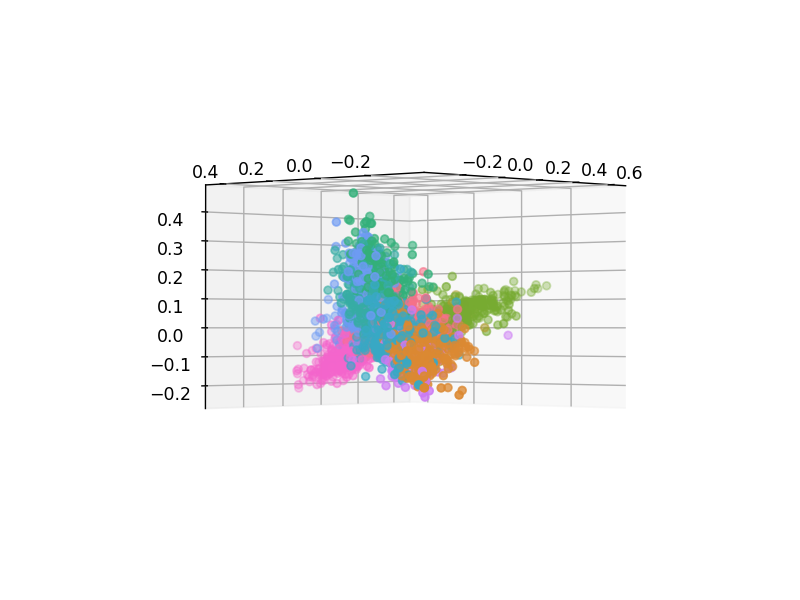

In [35]:
# Plotting Data
%matplotlib notebook
import seaborn as sns 

recipe_list = recipe_tfidf.index.tolist()
colors_list = sns.color_palette("husl", 10)
colors = []
labels = []
pc1 = reduced_recipe_tfidf[:,0]
pc2 = reduced_recipe_tfidf[:,1]
pc3 = reduced_recipe_tfidf[:,2]

for i in range(len(recipe_list)):
    colors.append(colors_list[recipe_clusters[i]])

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(pc1, pc2, pc3, c = colors)

plt.show()

### PCA on OHE Recipe Data 

Visualize lower dimensional representations of the one hot encoded recipe data without the TF-IDF encoding for comparison. 

In [36]:
train = pd.read_csv("data/ohe_train_recipes_v2.csv")
recipe_data = train.set_index("id").drop(columns=['cuisine'])
cuisine_by_id = train.set_index("id")['cuisine']

In [37]:
recipe_data.head(2)

,1% cottage cheese,1% milk,2% reduced-fat milk,33% less sodium ham,Alfredo sauce,Amaretti Cookies,American cheese,Anaheim chile,Angostura bitters,Baileys Irish Cream Liqueur,...,yogurt,yolk,yucca,yukon gold,yukon gold potatoes,yuzu,zest,zesty italian dressing,ziti,zucchini
id,,,,,,,,,,,,,,,,,,,,,
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
n = 3 #Number of components
pca = PCA(n_components = n)
reduced_recipes = pca.fit_transform(recipe_data)

In [39]:
recipe_pcs_df = pd.DataFrame(data=reduced_recipes, index=recipe_data.index, columns=["PC"+str(i+1) for i in range(reduced_recipes.shape[1])])
recipe_pcs_df = recipe_pcs_df.merge(cuisine_by_id, left_index=True, right_index=True)
recipe_pcs_df.head()

,PC1,PC2,PC3,cuisine
id,,,,
4,-0.696671,-0.324506,-0.304022,italian
16,0.819862,-0.214195,0.725167,indian
27,0.499600,-0.123333,0.628493,mexican
33,0.909146,0.190187,0.185050,mexican
67,1.080592,0.385075,0.584732,irish


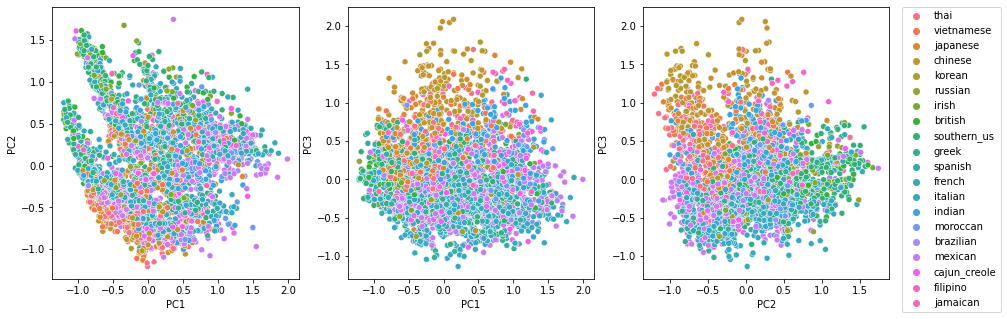

In [40]:
%matplotlib inline
fig, ax = plt.subplots(1,3,figsize=(15,5))
sns.scatterplot(data=recipe_pcs_df, x="PC1", y="PC2", ax=ax[0],
                hue="cuisine", palette=sns.color_palette("husl", 20),
                hue_order=dend['ivl'], legend=False);
sns.scatterplot(data=recipe_pcs_df, x="PC1", y="PC3", ax=ax[1],
                hue="cuisine", palette=sns.color_palette("husl", 20),
                hue_order=dend['ivl'], legend=False);
sns.scatterplot(data=recipe_pcs_df, x="PC2", y="PC3", ax=ax[2],
                hue="cuisine", palette=sns.color_palette("husl", 20),
                hue_order=dend['ivl']);
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0);

<IPython.core.display.Javascript object>


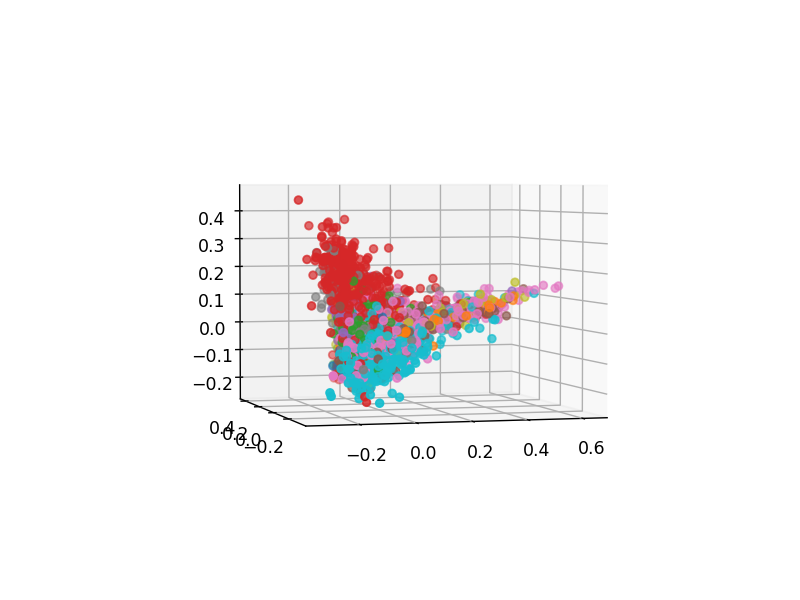

In [43]:
# Plotting Data
%matplotlib notebook

cuisine_dict = {k: v for v, k in enumerate(cuisine_list)}
cuisine_count = cuisine_by_id.nunique()
cuisine_classes = cuisine_by_id.map(cuisine_dict).to_numpy()
colors  = [f"C{i}" for i in np.arange(1, cuisine_count+1)]
cmap, norm = mpl.colors.from_levels_and_colors(np.arange(1, cuisine_count+2), colors)


pc1 = reduced_recipe_tfidf[:,0]
pc2 = reduced_recipe_tfidf[:,1]
pc3 = reduced_recipe_tfidf[:,2]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(pc1, pc2, pc3, c=cuisine_classes,
           cmap=cmap, norm=norm);
plt.show()